# The numpy.random package
***

## Overview of the package


The numpy.random package provides a number of tools for generating random numbers in Python code. Random numbers may be needed for a wide variety of purposes, such as testing the functioning of an algorithm by providing known parameters, or testing the validity of data gathered in an experiment against random data. For users with experience in statistical modelling and working with probability, the functions of the random package provide a high degree of flexibility and control over the characterstics of the data generated.
The random data is first generated with a seed using a BitGenerator function, in this case the ***default_rng()*** function. Seeds are explained in more detail in the final section of this notebook. This seed is then passed to a distribution function, which model the properties of mathematical distributions to generate a series of random values along the given distribution. For example, if the seed is passed to the ***normal()*** distribution function, the generated values will follow the properties of that distribution: most values will fall within two standard deviations of a mean value, the mean value will have the highest occurrence, the probability decrease of higher and lower values will be roughly symmetrical, etc. These properties can be tested by plotting the resulting values using Python's plotting packages, to confirm that the plotted values follow the expected shape for the given distribution.
***

## "Simple random data" and "Permutations" functions
***

### Simple random data

#### Integers

> Generator.integers(*low, high=None, size=None, dtype=np.int64, endpoint=False*)

The **integers()** function generates a sequence of random integers. The function takes one required argument, **low**, which defines the upper limit of values which may be returned. If an argument is also passed for the **high** parameter, the argument passed for **low** becomes the lower limit of values which may be returned, and **high** becomes the upper limit.

In [12]:
import numpy
import numpy.random as np

rng = np.default_rng()
rng.integers(5) # 5 is passed as the "low" argument
                # all outputs will be between 0 (inclusive) and 5 (exclusive)

2

In [58]:
rng.integers(5, 10) # 5 is the "low" argument, 10 as the "high" argument;
                    # outputs will be between 5 (inclusive) and 10 (exclusive)

7

The **integers()** function returns one integer value, unless an argument is passed for the **size** parameter, in which case a sequence of values of size equal to the value of the argument is returned.

In [59]:
rng.integers(5, size=10) # this will return 10 values between 0 and 5 (exclusive)

array([3, 3, 1, 0, 0, 1, 2, 2, 0, 0], dtype=int64)

A tuple (an unchangeable list of items) can be passed to the **size** parameter if the returned values should be in a multi-dimensional instead of one-dimensional array. The first value of the tuple defines the number of rows in the returned ndarray, and the second value defines the number of columns.

In [60]:
rng.integers(10, size=(3, 4)) # generates integers of values below 10; 3 rows, 4 columns

array([[2, 5, 8, 0],
       [2, 9, 3, 3],
       [8, 2, 8, 6]], dtype=int64)

The dtype of the result can defined with the **dtype** parameter. The results can be confirmed by passing the **integers()** function inside the **type()** from the standard library.

In [61]:
print(rng.integers(10, dtype=numpy.uint8))
type(rng.integers(10, dtype=numpy.uint8))

1


numpy.uint8

The **endpoint** parameter can be passed a Boolean ***True*** or ***False*** value to change the functioning of the **low** and **high** parameters. If **endpoint** is set to ***True***, the value of **high** will be inclusive, so integers of that value can be returned. By default **endpoint** is set to ***False***, so the value of **high** is exclusive, meaning integers of that value cannot be returned (only integers of one increment lower, at maximum). The latter case is called a half-open interval.

In [62]:
rng.integers((1, 2), endpoint=True)

array([0, 1], dtype=int64)

***

#### Random

>  Generator.random(*size=None, dtype=np.float64, out=None*)

The **random()** function returns float values from the interval 0.0 – 1.0. If no arguments are passed to the function's parameters, it will return a single float value.

In [63]:
rng.random()

0.5404040851913837

The **size** parameter is used, as in the **integers()** function, to define the number of values returned, and can take an integer or tuple value as argument. The **dtype** parameter is also used the same as in the **integers()** function, but only *float64* and *float32* are supported.

In [64]:
rng.random(10)

array([0.85327623, 0.1888416 , 0.56736888, 0.84228961, 0.45117704,
       0.25354188, 0.36911223, 0.22097662, 0.52883882, 0.86313305])

In [65]:
rng.random(10, dtype="float32")

array([0.13780725, 0.8686391 , 0.11981499, 0.47745574, 0.650949  ,
       0.7677648 , 0.20431817, 0.18283272, 0.7723092 , 0.5723767 ],
      dtype=float32)

The **out** parameter takes a multi-dimensional array to define the shape of the output.

In [66]:
rng.random()

0.877673088209276

***

#### Choice
> Generator.choice(*a, size=None, replace=True, p=None, axis=0, shuffle=True*)

The ***choice()*** function returns a random sample from a one-dimensional array passed as an argument.

The ***a*** parameter is required, and takes an integer or array as its argument. If an integer is passed, the function runs ***np.arange(x)*** to generate the random value; if an array is passed, the return value is randomly selected from its elements.

In [16]:
choices = rng.integers(10, size=10) # generating a 1d array
print(choices) # printing the array
rng.choice(choices) # choice() selects one element from the array

[4 7 5 9 5 6 4 3 2 2]


2

The ***size*** parameter again defines the output shape. If an integer is passed, the returned array will be of size equal to the value of that integer; if a tuple is passed, the values of the tuple will define the rows and columns of the returned multi-dimensional array.

In [17]:
rng.choice(choices, size=(2,7)) # generating a 2d array

array([[4, 4, 6, 2, 7, 4, 5],
       [7, 4, 3, 2, 5, 3, 4]], dtype=int64)

The ***p*** parameter take a one-dimensional array of float values between 0.0 and 1.0, with the same number of elements as the array passed for the ***a*** parameter, and uses the float values to set the probability of each corresponding value in the ***a*** array being returned. The sum of the elements of ***p*** must total 1.0.

In the example below, the element of ***a*** in the second index position has an assigned probability of 0.3, and so it appears more frequently in the output arrays.

In [18]:
rng.choice(choices, size=(2,10), p=(0.1, 0.3, 0.05, 0.1, 0.1, 0.05, 0.1, 0.025, 0.075, 0.1))
# setting the probability for each element

array([[2, 5, 4, 7, 7, 5, 9, 5, 4, 4],
       [7, 4, 4, 6, 2, 7, 6, 7, 7, 5]], dtype=int64)

The ***axis*** parameter defines the axis along which the selection is performed, either along rows (0) or columns (1).

In [70]:
tupleChoice = ([1, 2, 3], [4, 5, 6], [7, 8, 9]) # declaring a tuple to pass to the "a" parameter
rng.choice(tupleChoice, axis=0) # passing the tuple to choice(), setting the axis to rows
                                # one of the arrays is returned in full

array([1, 2, 3])

In [71]:
rng.choice(tupleChoice, axis=1) # setting the axis to columns
                                # the first element of each array is returned

array([3, 6, 9])

The ***shuffle*** parameter takes a Boolean value and determines whether the sample is shuffled  when sampling without replacement.

In [72]:
rng.choice(choices, size=10, shuffle=True)

array([8, 8, 0, 1, 7, 1, 1, 0, 7, 6], dtype=int64)

***

#### Bytes
> Generator.bytes(*length*)

The ***bytes()*** function returns a string of random bytes. It takes an integer as argument to define the length of the returned string.

In [73]:
rng.bytes(20)

b"'\xe4o\xdaj\x9f\x96\xc0e\xb8\x16b\x15&W\x982*\x0c\x84"

***

### Permutations

#### Shuffle

> Generator.shuffle(*x, axis=0*)

The ***shuffle()*** function randomises a sequence of elements by shuffling their positions. The function requires an array or list object to be passed as an argument. There is no return parameter for the function, as the array or list itself is modified so that its elements are permanently reordered. An integer can also be passed as an optional argument to define the axis along which the array is shuffled.

In [74]:
shuffleArray = rng.integers(21, size=15) # generating an array
shuffleArray

array([ 6, 14, 16,  4,  2, 10, 10,  2,  8,  8,  7,  0, 15, 17,  4],
      dtype=int64)

In [75]:
rng.shuffle(shuffleArray) # shuffling the array
shuffleArray # testing if the original array is modified

array([17,  8, 15,  2,  8,  7,  4, 10, 14,  0,  6, 10,  4, 16,  2],
      dtype=int64)

***

#### Permutation

> Generator.permutation(*x*)

The ***permutation()*** function is used to either randomly permute a sequence or generate a permuted range. If the argument passed is an integer, the function will run ***np.arange(x)*** on that integer, permute the generated range of values, and return the generated sequence as an array. If the argument passed is an array, ***permutation()*** makes a copy (which it passes to an ndarray object) and randomly reorders the elements of the array. Unlike ***shuffle()***, ***permutation()*** does not modify the original object.

In [76]:
rng.permutation(21) # passing an integer

array([16,  3, 12, 11, 17, 19, 18,  8,  2,  1,  6,  0, 13,  9,  7,  5, 20,
        4, 15, 10, 14])

In [77]:
rng.permutation(shuffleArray) # passing an array

array([14, 15,  4,  2, 16, 10,  0,  8,  4,  2, 17,  8,  7, 10,  6],
      dtype=int64)

In [78]:
shuffleArray # testing if the original array is modified

array([17,  8, 15,  2,  8,  7,  4, 10, 14,  0,  6, 10,  4, 16,  2],
      dtype=int64)

***

## Distribution functions
***

### Normal distribution

> Generator.normal(*loc=0.0, scale=1.0, size=None*)

A normal or Gaussian distribution is one in which values are distributed in a bell-shaped curve, with most points clustering around a central mean value (which forms the highest pointo n the *y* axis) and with a roughly symmetrical distribution of higher and lower values. Examples of this distribution occur frequently in nature, as random distributions of data from independent sources tend toward a normal form as the sample size increases. An example of this is height: most adults in a given population measure roughly the same mean height, with diminishing numbers of people recording higher and lower values (i.e., equally few people will be unusually tall or short compared to the mean).

Because the normal distribution emerges as a property of random data sets, it is useful to data scientists in hypothesis testing. As Francis Morales outlines in [this article](https://medium.com/analytics-vidhya/the-normal-distribution-for-data-scientists-6de041a01cb9), the known properties of the normal distribution, such as the number of standard deviations within which certain percentages of data points should fall, help to identify outliers in the data. This can help to highlight distortions in the gathered data which can then be controlled for.

The ***normal()*** function is used to draw random samples from a normal distribution. It takes two required parameters, both of which are float values: ***loc*** defines the mean value which will correspond to the centre of the ditribution; ***scale*** defines the standard deviation of the distribution, which determines the width or spread of the distribution.

It also takes the ***size*** parameter, which defines the number of values returned. This argument is passed as an int value if the returned values should form a 1-dimensional array, and a tuple value if the they should form a multi-dimensional array.

In [9]:
meanValue = rng.integers(0, 11) # mean value generated as integer
stdDev = rng.random() # standard deviation generated as float
norm = np.default_rng().normal(meanValue, stdDev, 100) # setting the variable containing the normal distribution values
norm

array([3.84780829, 4.26239119, 4.62318299, 4.8530794 , 3.94183865,
       3.57598553, 4.7551997 , 4.17127666, 4.2644462 , 4.64207015,
       4.12359552, 4.01484858, 4.77660757, 3.56468614, 4.01834034,
       4.06699969, 4.14098003, 3.90752404, 4.47288316, 3.56352688,
       4.00826291, 3.91565813, 4.03457741, 3.5731876 , 4.59689822,
       4.41756546, 3.59581153, 4.24872577, 2.66699875, 4.60201447,
       3.28339842, 4.8816845 , 4.41621639, 3.11726238, 4.18555863,
       2.9611331 , 3.48699526, 4.41006523, 3.93976593, 3.96545575,
       3.86540724, 4.78318244, 4.18702284, 3.6392308 , 6.07536072,
       3.02847187, 3.20995501, 4.23676965, 4.38233058, 3.50845506,
       4.46192495, 3.95328073, 4.03747362, 3.75893539, 4.20498725,
       3.73818805, 4.56761254, 3.60549732, 4.1176257 , 3.5824378 ,
       3.64613641, 4.86526216, 4.09538459, 3.83655564, 3.72931928,
       3.66727379, 3.58990851, 4.01377279, 3.81736805, 4.86496546,
       3.62823658, 3.04696903, 3.97639729, 2.90032479, 4.55912

The [numpy documentation](https://numpy.org/doc/stable/reference/random/generated/numpy.random.Generator.normal.html#numpy.random.Generator.normal) for the ***normal()*** function gives the following formula to test if the above values form a normal distribution. I will use the randomly generated values in the previous cell to perform the test.

Text(0, 0.5, 'probability')

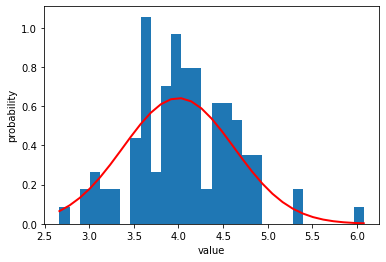

In [25]:
import matplotlib.pyplot as plt
count, bins, ignored = plt.hist(norm, 30, density=True) # defining the histogram
plt.plot(bins, 1/(stdDev * numpy.sqrt(2 * numpy.pi)) * numpy.exp( - (bins - meanValue)**2 / (2 * stdDev**2)), linewidth=2, color='r')
plt.xlabel("value")
plt.ylabel("probability")

The evenness of the distribution and symmetry of the curve can be improved by increasing the sample size, since we know that small random samples from independent sources, like those generated by the ***normal()*** function, tend toward the standard normal distribution shape as sample size increases:

Text(0, 0.5, 'probability')

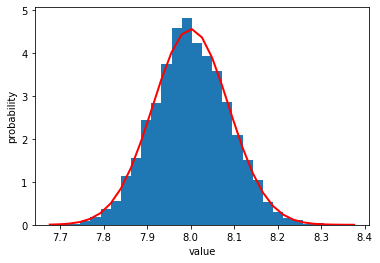

In [144]:
norm = np.default_rng().normal(meanValue, stdDev, 5000) # increasing sample size
count, bins, ignored = plt.hist(norm, 30, density=True)
plt.plot(bins, 1/(stdDev * numpy.sqrt(2 * numpy.pi)) * numpy.exp( - (bins - meanValue)**2 / (2 * stdDev**2)), linewidth=2, color='r')
plt.xlabel("value")
plt.ylabel("probability")

***

### Uniform

> Generator.uniform(*low=0.0, high=1.0, size=None*)

The uniform or rectangular distribution describes output values that fall within a pair of known maximum and minimum values. When plotted, the uniform distribution is defined by the plot line being flat, indicating an equal probability for all outcomes. This distribution is important for generating random numbers and testing randomness, as any output number should have the same likelihood of occurrence as any other. If the resulting distribution is not flat, it can indicate that the process for generating randomness is skewed. For example, with a high enough sample size, all the balls in a bingo game should have the same probability of being dispensed. If the outcomes of *n* ball selections is plotted and the mean probability is found not to be uniform, it indicates that factors such as the weight of the balls are distorting the outcomes.

The ***uniform()*** function has one required parameters, ***high***, which takes as argument a float value or array of floats which sets the upper limit of the output interval. It also has the optional parameters ***low***, which sets the lower limit of the interval, and ***size***, which takes an int or tuple of ints to determine the number of values returned.

In [81]:
uniformArray = numpy.sort(rng.random(size=2)) # generating two random values to act as upper and lower bounds
lowerBound, upperBound = uniformArray # assigning the variables
uniformValues = np.default_rng().uniform(lowerBound, upperBound, size=1000) # setting the variable containing the uniform distribution values
uniformValues

array([0.64752209, 0.77405306, 0.5264662 , 0.80676957, 0.77178302,
       0.9101906 , 0.78245245, 0.70414965, 0.60550553, 0.52679828,
       0.46235462, 0.77901972, 0.50225609, 0.95039745, 0.47121487,
       0.74456907, 0.94289028, 0.61282638, 0.50972189, 0.72526609,
       0.58253238, 0.7013058 , 0.75864123, 0.44774485, 0.67868029,
       0.62536593, 0.65531788, 0.63599399, 0.48359059, 0.42396608,
       0.55025984, 0.52505096, 0.64281096, 0.48038019, 0.88058938,
       0.87122729, 0.43331962, 0.87838686, 0.93812695, 0.65414264,
       0.94374114, 0.50989328, 0.68653213, 0.98090644, 0.4875348 ,
       0.74387839, 0.71134626, 0.46186847, 0.42306084, 0.74217873,
       0.90014526, 0.63080632, 0.80327472, 0.56279644, 0.63276804,
       0.58200099, 0.78389299, 0.61806827, 0.83743312, 0.4801019 ,
       0.77287096, 0.44402535, 0.81743722, 0.44985341, 0.77121219,
       0.82317409, 0.8314413 , 0.92752373, 0.5546656 , 0.5454571 ,
       0.92307881, 0.43964985, 0.44168924, 0.60370022, 0.81522

The [numpy documentation](https://numpy.org/doc/stable/reference/random/generated/numpy.random.Generator.uniform.html#numpy.random.Generator.uniform) for the ***uniform()*** function gives the following formula to test if the above values form a uniform distribution:

Text(0, 0.5, 'probability')

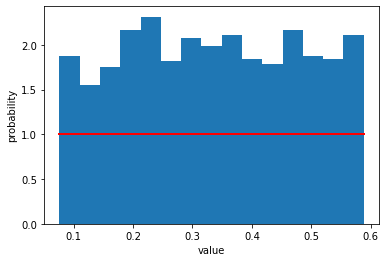

In [111]:
count, bins, ignored = plt.hist(uniformValues, 15, density=True)
plt.plot(bins, numpy.ones_like(bins), linewidth=2, color='r')
plt.xlabel("value")
plt.ylabel("probability")

As we can see, the mean probability for all values is constant, indicating that this is a uniform distribution.

***

### Poisson

> Generator.poisson(*lam=1.0, size=None*)

The Poisson distribution is used to find the likelihood of a randomly-occurring event taking place if the mean frequency occurrence of the event is already known, and if occurrences of the event are independent of one another (i.e., no occurrence influences the likelihood of another occurring). An example of the Poisson distribution being applied is given in the novel *Gravity's Rainbow*, where it is used to calculate the likelihood of V-2 rocket strikes happening in any 1km<sup>2</sup> area of London during World War II. The strikes occur randomly and independently with a known mean frequency, and so a probability map can be produced showing the risk of strikes in any area of the city. The Poisson distribution can be used to derive an estimate of future performance in systems such as typography (estimating the number of printing errors per page), customer service (estimating the number of calls received at a call centre per day) or physics (estimating radioactive decay over a given period). In all such cases, the requirements of the Poisson distribution are applicable: the events occur at random intervals, the mean occurrence time of the events is known, the events are independent of one another.

The ***poisson()*** function draws a series of random samples from a Poisson distribution. It takes one required parameter, ***lam***, as a float value or array of floats, which defines the number of expected events in a given interval of time or space. This value must be greater than or equal to 0.

Poisson() also takes an int or array of int values as argument for the ***size*** distribution. This defines the number of values returned, in 1-dimensional or multi-dimensional array.

The [numpy documentation](https://numpy.org/doc/stable/reference/random/generated/numpy.random.Generator.poisson.html#numpy.random.Generator.poisson) for the ***poisson()*** function gives the following code for generating a plot of the Poisson distribution.

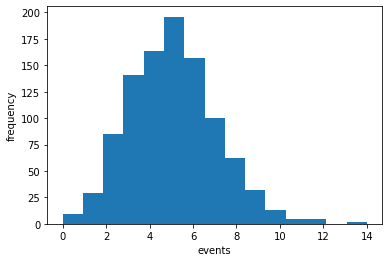

In [126]:
poissonValues = np.poisson(5, 1000) # passing the arguments for the lam and size parameters
count, bins, ignored = plt.hist(poissonValues, 15, density=False) # generating the histogram
plt.xlabel("events")
plt.ylabel("frequency")
plt.show()

Using this example, we can approximate the Poisson distribution from *Gravity's Rainbow*, taking the ***lam*** parameter as the number of rocket strikes per day, and the ***size*** parameter as the number of 1km<sup>2</sup> areas of London city.
* Period of V-2 strikes: 201 days ([source](https://en.wikipedia.org/wiki/V-2_rocket))
* Number of rocket strikes: 1358
* Area of London: 1579 km<sup>2</sup> (not accurate to 1945)
* Mean rocket strikes per day: 1358 / 201 = 6.75

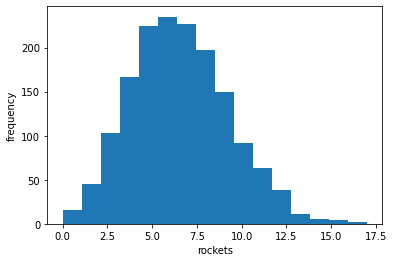

In [149]:
meanRocketsPerDay = 6.75
area = 1579
rocketsAreaDistribution = np.poisson(meanRocketsPerDay, area)
count, bins, ignored = plt.hist(rocketsAreaDistribution, 16, density=False) # generating the histogram
plt.xlabel("rockets")
plt.ylabel("frequency")
plt.show()

This plot demonstrates the relative frequency with which a greater or lesser number of rocket strikes than the daily mean would have happened on any given day.

***

### Binomial

> Generator.binomial(*n, p, size=None*)

The binomial distribution is related to the Poisson distribution. Whereas the Poisson distribution documents the occurrence or non-occurrence of an event within an interval of time based on many previous events, the binomial distribution studies the probability of having a certain number of successful occurrences in *n* number of trials. The trials measured must have binary outcomes which are mutually exclusive, such as coin-tossing, random bits reading as 0 or 1, or measuring the up or down spin of quantum particles. These types of success-failure trials are called Bernoulli trials, and the binomial distribution simply describes the probability distribution of multiple Bernoulli trials grouped together. The probability of each outcome must also be constant between trials, and, as with the Poisson distribution, the trials must be independent of each other.

The ***binomial()*** function takes two required arguments: an int or array of ints *n*, describing the number of trials, and a float or array of floats *p*, describing the probability of success, which must be >= 0 and <= 1.

In [5]:
successes = rng.binomial(10, 0.5) # 10 trials, 50% probability of success
print(successes)

4


The ***binomial()*** function also takes an integer as argument for the ***size*** parameter to define the shape of the output array.

In [6]:
successes = rng.binomial(1000, 0.2, 100) # the number of successes in 1000 trials at 20% probability of success
# output array returns results of 100 groupings of trials
successes

array([183, 193, 206, 187, 199, 203, 173, 225, 193, 202, 195, 203, 199,
       187, 181, 195, 187, 210, 180, 200, 210, 201, 210, 193, 187, 194,
       206, 195, 176, 192, 198, 213, 207, 189, 202, 198, 214, 202, 173,
       193, 200, 190, 218, 195, 187, 182, 180, 193, 204, 202, 175, 186,
       208, 203, 213, 191, 216, 225, 203, 216, 196, 208, 188, 192, 202,
       191, 199, 203, 190, 190, 187, 208, 172, 171, 216, 208, 206, 205,
       196, 212, 188, 216, 236, 211, 208, 197, 182, 205, 196, 188, 195,
       190, 183, 195, 190, 223, 199, 229, 185, 179], dtype=int64)

I have modified the code in [this article](https://www.kdnuggets.com/2020/02/probability-distributions-data-science.html) (replacing the binomial function from the scipy.stats package with that from the numpy package and changing the calculation of the *y* axis) to demonstrate the number of successes for each randomly generated number of trials with a varying probability score.

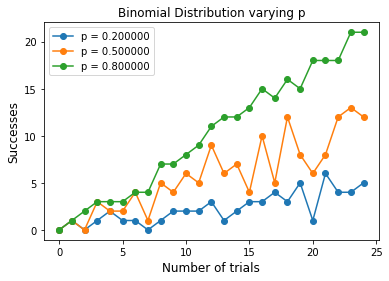

In [7]:
for prob in range(2, 10, 3): # setting the incrementing probability values
    n = numpy.arange(0, 25) # setting the array of arguments for the n parameter
    binom = rng.binomial(n, (0.1*prob)) # generating the binomial distribution
    # print("N = ", n)
    # print("Binom = ", binom) used these to verify that the returned binomial values were valid, not exceeding the N values
    plt.plot(binom, '-o', label="p = {:f}".format(0.1*prob))
    plt.xlabel('Number of trials', fontsize=12)
    plt.ylabel('Successes', fontsize=12)
    plt.title("Binomial Distribution varying p")
    plt.legend()

We see that the success values increase steadily with the number of trials and increase in probability, e.g., 20 trials at .2 probability returns 4 successes.

***

### Multinomial

> Generator.multinomial(*n, pvals, size=None*)

The multinomial distribution is a generalisation of the binomial distribution. Where the binomial distribution returns the probability of success for one of two possible outcomes in repeated trials, the multinomial distribution describes the probability of success for each of a discrete number of possible outcomes exceeding two. For example, where the binomial distribution might be used to measure the probability of the results of a presidential election between two candidates, the multinomial distribution could be used to do the same for the results of a party primary election between numerous candidates. As with previous distributions, the probability for each outcome must remain constant between trials and the trials must be independent.

The ***multinomial()*** function takes two required arguments: an int or array of ints *n*, describing the number of trials, and *pvals*, a sequence of floats of length *p*, describing the probabilities of each of the potential outcomes. The sum of the probability values passed to the *pvals* parameter must total 1.0.

In [219]:
rng.multinomial(50, [0.5, 0.1, 0.2, 0.2])

array([23,  6, 13,  8], dtype=int64)

In this example, the first result was returned 23 times, the second 6 times, etc.

The ***multinomial()*** function also takes an integer as argument for the ***size*** parameter to define the shape of the output array.

In [225]:
rng.multinomial(50, [0.4, 0.15, 0.05, 0.2, 0.05, 0.15], 5)

array([[22, 11,  0, 10,  4,  3],
       [22,  7,  1, 11,  2,  7],
       [15, 10,  4, 10,  2,  9],
       [21, 11,  3,  9,  1,  5],
       [22, 10,  3,  9,  2,  4]], dtype=int64)

***

### Exponential

> Generator.exponential(*scale=1.0, size=None*)

The exponential probability distribution describes the expected time intervals between recorded events. As described in [this article](https://courses.lumenlearning.com/introstats1/chapter/the-exponential-distribution/), the exponential distribution is frequently used in the field of reliability, such as for estimating the time intervals before a particular product breaks down and requires repairs, or estimating the time between server outages. It is related to the Poisson distribution in that the rate of occurrence of an event is being measured in the variable λ, and events must be independent and of a known mean rate of occurrence.

The ***exponential()*** function generates an array of random numbers along an exponential distribution. It takes a float or array of floats as argument for the *scale* parameter, where x > 0. This parameter defines the statistical dispersion of the distribution (how widely distributed or concentrated the generated values are). It also takes an int or tuple of ints for the ***size*** parameter, describing the shape of the output distribution.

In [11]:
exponentialValues = rng.exponential(4.5, 1000)
exponentialValues

array([1.27935444e+00, 5.43512816e+00, 1.16056720e+01, 4.60855517e+00,
       2.42728834e+00, 1.10335326e+01, 1.50523876e+01, 7.06330635e+00,
       2.05511392e+00, 1.33301107e+01, 3.62619389e+00, 1.19897088e+00,
       1.68662053e+00, 1.97374609e+01, 3.03301047e+00, 7.49415407e-01,
       6.69681733e+00, 9.20496670e+00, 7.27848599e+00, 5.23427933e-01,
       1.96675281e+00, 3.91305775e-01, 5.00823700e-01, 5.36659423e+00,
       1.59294882e+00, 5.62374307e+00, 6.22542657e+00, 1.76697745e+00,
       1.50809468e+01, 3.86645031e+00, 3.45547555e+00, 7.01687500e+00,
       9.97751346e+00, 1.55386795e+00, 5.37775994e+00, 1.01691728e+01,
       5.71203614e+00, 3.44935154e+00, 3.13125924e+00, 1.94554604e+00,
       1.60199897e-01, 3.10671689e+00, 9.50151656e-01, 5.22832375e+00,
       3.41816178e-01, 2.08620208e+00, 1.67316143e+01, 1.39387887e-01,
       7.48261199e-02, 2.30084302e-01, 4.82640072e+00, 1.11197529e+01,
       8.73513840e+00, 6.93089638e-03, 4.32578093e+00, 6.04416720e+00,
      

Text(0, 0.5, 'P(x)')

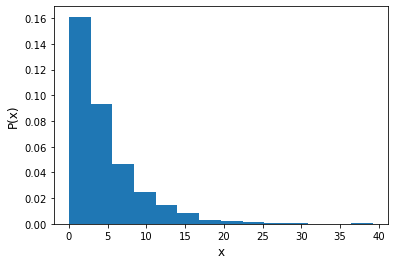

In [29]:
import matplotlib.pyplot as plt
count, bins, ignored = plt.hist(exponentialValues, 14, density=True)
plt.xlabel('x', fontsize=12)
plt.ylabel('P(x)', fontsize=12)

We can see that the shape of the exponential distribution histogram is consistent even when the parameters of the distribution are altered:

Text(0, 0.5, 'P(x)')

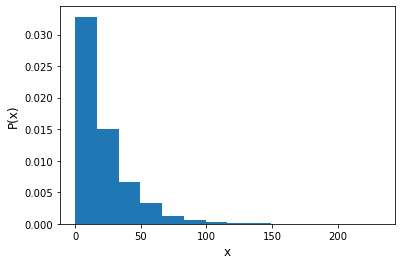

In [35]:
exponentialValues = rng.exponential(20.9, 10000)
count, bins, ignored = plt.hist(exponentialValues, 14, density=True)
plt.xlabel('x', fontsize=12)
plt.ylabel('P(x)', fontsize=12)

***

## Seeds
***

A ***seed*** is a piece of information which is supplied to an algorithm to generate pseudorandom data. Because of the deterministic nature of the calculations run by computers, where inputs follow predictable methods to arrive at outputs, computers cannot produce truly random numbers without input from external sources. Some of these sources may include:

* weather data from a live-updating source
* the current time reading from the computer's processor
* processor temperature or fan speed
* user-generated data such as the change of cursor position

The computer takes data from one or a combination of such sources in the form of a long string of numbers, and this data forms the seed. The seed is then passed as input into a generator algorithm to produce pseudorandom data. Because the calculations used to generate the latter data is deterministic, the results are not truly random. However, because the input seed data is unpredictable and unlikely to repeat, the output numbers are an adequate approximation of truly random data. This also means that if the same seed is supplied to the generator algorithm, the exact same output numbers will be produced (hence the data is only “pseudo”-random).

The memory location of the randomly generated seed can be checked by passing the BitGenerator variable:

In [14]:
rng

Generator(PCG64) at 0x1DDCE4C48B0

Using the ***seed()*** function from Python's ***random*** package, we can show the effects of passing the same seed to a random number generator, as demonstrated in this [W3Schools exercise](https://www.w3schools.com/python/ref_random_seed.asp).

In [9]:
import random
random.seed(5)
print(random.random())
random.seed(10)
print(random.random())
random.seed(10)
print(random.random())

0.6229016948897019
0.5714025946899135
0.5714025946899135


While passing different arguments to the ***seed()*** function produces different resulting float values, we can see that passing the same argument in repeated trials will generate the same output. This is due to the deterministic nature of the computer's data-generation processes, resulting data that is only pseudorandom rather than truly random. This use of seeds to produce a predictable set of pseudorandom results finds application in cryptography, using the seed values as security keys.

### References

* Numpy.random documentation. https://numpy.org/doc/stable/reference/random/index.html
* Generating Random Data in Python (Guide). https://realpython.com/python-random/
* Return value of type(type) in Python. https://www.includehelp.com/python/return-value-of-type-type-in-python.aspx
* Pseudorandom vs. random. https://simplicable.com/new/pseudorandom-vs-random
* 7 Example of a Random Seed. https://simplicable.com/new/random-seed
* How to Use Random Seeds Effectively. https://towardsdatascience.com/how-to-use-random-seeds-effectively-54a4cd855a79
* Normal Distribution Plot Using Numpy and Matplotlib. https://www.geeksforgeeks.org/normal-distribution-plot-using-numpy-and-matplotlib/
* Normal Distribution Vs Uniform Distribution. https://thatascience.com/learn-numpy/normal-vs-uniform/
* The Normal Distribution for Data Scientists. https://medium.com/analytics-vidhya/the-normal-distribution-for-data-scientists-6de041a01cb9
* Probability Distributions in Data Science. https://www.kdnuggets.com/2020/02/probability-distributions-data-science.html
* Numpy uniform documentation. https://numpy.org/doc/stable/reference/random/generated/numpy.random.Generator.uniform.html#numpy.random.Generator.uniform
* Numpy Poisson documentation. https://numpy.org/doc/stable/reference/random/generated/numpy.random.Generator.poisson.html#numpy.random.Generator.poisson
* Poisson Distribution — Intuition, Examples, and Derivation. https://towardsdatascience.com/poisson-distribution-intuition-and-derivation-1059aeab90d
* Poisson Distribution. https://www.w3schools.com/python/numpy_random_poisson.asp
* V-2 Rocket. https://en.wikipedia.org/wiki/V-2_rocket
* An Introduction to Probability Distribution. https://medium.com/analytics-steps/an-introduction-to-probability-distribution-9ed53d33e8d7
* Numpy binomial documentation. https://numpy.org/doc/stable/reference/random/generated/numpy.random.Generator.binomial.html#numpy.random.Generator.binomial
* Demystifying the Binomial Distribution. https://towardsdatascience.com/demystifying-the-binomial-distribution-580475b2bb2a
* Numpy multinomial documentation. https://numpy.org/doc/stable/reference/random/generated/numpy.random.Generator.multinomial.html#numpy.random.Generator.multinomial
* The Multinomial Probability Distribution. https://medium.com/analytics-vidhya/the-multinomial-probability-distribution-8ae4db03a3d3
* Numpy exponential documentation. https://numpy.org/doc/stable/reference/random/generated/numpy.random.Generator.exponential.html#numpy.random.Generator.exponential
* How to Use Numpy Exponential. https://www.sharpsightlabs.com/blog/numpy-exponential/
* NumPy Exponential Distribution (Python Tutorial). https://wtmatter.com/numpy-exponential-distribution/
* Python Random seed() Method. https://www.w3schools.com/python/ref_random_seed.asp


